In [1]:
"""
Name: fd_counts.ipynb
Authors: Stephan Meighen-Berger
Checking the counts at a specific distance
"""

'\nName: fd_counts.ipynb\nAuthors: Stephan Meighen-Berger\nChecking the counts at a specific distance\n'

In [2]:
"""
Imports
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.signal import peak_widths, find_peaks
from scipy.optimize import root
from scipy.stats import gamma
import sys
from scipy.optimize import root
from tqdm import tqdm
sys.path.append("../core/")

In [3]:
# Latex text rendering
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [4]:
# Importing dob module
from fourth_day import FD
from fd_config import config

In [5]:
# Looping over velocities
velocities = np.logspace(-2, 3, 3)
seconds = 3600
population = 100
distances = np.array([1e2])
light_yields_vel = []
light_yields_vel_avg = []
for vel in tqdm(velocities):
    # Solving
    fd = FD(org_filter='generous')
    res, res_avg = fd.solve(population, vel, distances, 1., run_count=seconds)
    light_yields_vel.append(res)
    light_yields_vel_avg.append(res_avg)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:14<00:00,  4.74s/it]


In [6]:
std_size = 6.
fontsize = 20.
lw=3.

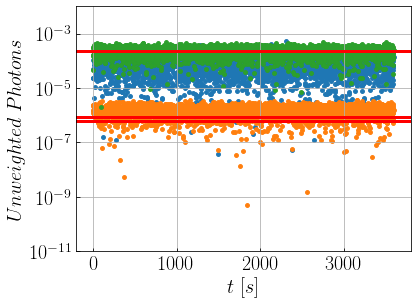

In [7]:
# Energy distributions
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
for idv, _ in enumerate(velocities):
    ax.scatter(range(seconds), light_yields_vel[idv][:, 0], s=lw*5)
    ax.axhline(light_yields_vel_avg[idv][0], color='r', lw=lw)
# ax.set_xlim(1e0, 1e3)
ax.set_ylim(1e-11, 1e-2)
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlabel(r'$t\;[s]$', fontsize=fontsize)
ax.set_ylabel(r'$Unweighted\;Photons$', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
plt.grid(True)
plt.show()

In [8]:
light_yields_vel_avg

[array([6.12391707e-07]), array([8.74661663e-07]), array([0.00021969])]

In [15]:
# Looping over populations
population = np.logspace(0, 3, 3).astype(int)
seconds = 3600
vel = 0.1
distances = np.array([1e2])
light_yields_pop = []
light_yields_pop_avg = []
for pop in tqdm(population):
    # Solving
    fd = FD(org_filter='generous')
    res, res_avg = fd.solve(pop, vel, distances, 1., run_count=seconds)
    light_yields_pop.append(res)
    light_yields_pop_avg.append(res_avg)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:48<00:00, 16.11s/it]


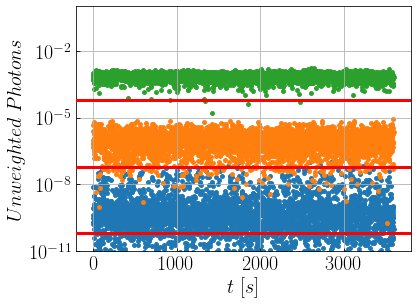

In [16]:
# Energy distributions
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
for idp, _ in enumerate(population):
    ax.scatter(range(seconds), light_yields_pop[idp][:, 0], s=lw*5)
    ax.axhline(light_yields_pop_avg[idp][0], color='r', lw=lw, zorder=100)
# ax.set_xlim(1e0, 1e3)
ax.set_ylim(1e-11, 1e0)
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlabel(r'$t\;[s]$', fontsize=fontsize)
ax.set_ylabel(r'$Unweighted\;Photons$', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
plt.grid(True)
plt.show()

In [14]:
light_yields_pop_avg

[array([6.3866007e-11]), array([6.13752327e-08]), array([6.3866007e-05])]

In [ ]:
[array([6.3866007e-11]), array([6.13752327e-08]), array([6.3866007e-05])]